<a href="https://colab.research.google.com/github/wilile26811249/KalmanFilter/blob/main/KalmanFilter2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [99]:
np.random.seed(0)

In [104]:
x = np.matrix([[10.0, 10.0],
        [1.0, 1.0]])    # 初始狀態 (位置，速度)
x_hat = np.matrix([[10.0, 10.0],
          [1.0, 1.0]])  # 估計的初始值 (位置，速度)

Q = np.matrix([[1.5, 0.0],
        [0.0, 1.5]])    # 觀察的噪聲協方差
R = np.matrix([[1.5, 0.0],
        [0.0, 1.5]])    # 測量的噪聲協方差

F = np.matrix([[1, 1],
        [0, 1]])    # 狀態轉移矩陣 (transition matrix)
H = np.matrix([[1.0, 0.0],
        [0.0, 1.0]]) # 觀察矩陣
p = np.matrix([[1.0, 0.0],
        [0.0, 1.0]]) # Posterior誤差協方差初始值

In [105]:
x_log = x
z_log = np.matrix([[], []])
x_hat_log = x_hat
x_phat_log = np.matrix([[], []])

In [106]:
step = 30
for _ in range(step):
  # 狀態轉移
  P_noise = np.random.randn(Q.shape[0], 2) * np.diag(Q).reshape(-1, 2)**0.5
  x = F * x + P_noise
  x_log = np.hstack((x_log, x))

  # 測量
  M_noise = np.random.randn(R.shape[0], 2) * np.diag(R).reshape(-1, 2)**0.5
  z = H * x + M_noise
  z_log = np.hstack((z_log, z))

  # 預測
  x_phat = F * x_hat
  p_hat = F * p * F.T + Q
  x_phat_log = np.hstack((x_phat_log, x_phat))

  # 更新 or 校正
  k = p_hat * H.T * (H * p_hat * H.T + R)**-1
  x_hat = x_hat + k * (z - H * x_phat)
  p = (np.mat(np.identity(2)) - k.T * H) * p_hat
  x_hat_log = np.hstack((x_hat_log, x_hat))

Text(0, 0.5, 'Velocity($m\\cdot s^{-1}$)')

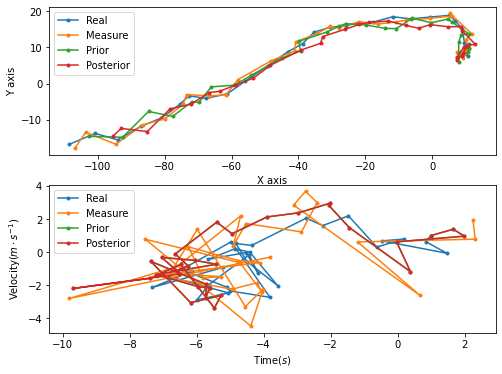

In [107]:
legend_text = ['Real', 'Measure', 'Prior', 'Posterior']
plt.figure(figsize = (8, 6))
plt.subplot(211)
plt.plot(np.squeeze(np.asarray(x_log[0, 0::2])), np.squeeze(np.asarray(x_log[0, 1::2])),
     np.squeeze(np.asarray(z_log[0, 0::2])), np.squeeze(np.asarray(z_log[0, 1::2])),
     np.squeeze(np.asarray(x_phat_log[0, 0::2])), np.squeeze(np.asarray(x_phat_log[0, 1::2])),
     np.squeeze(np.asarray(x_hat_log[0, 0::2])), np.squeeze(np.asarray(x_hat_log[0, 1::2])), marker = '.')
plt.legend(legend_text)
plt.xlabel('X axis')
plt.ylabel('Y axis')

plt.subplot(212)
plt.plot(np.squeeze(np.asarray(x_log[1, 0::2])), np.squeeze(np.asarray(x_log[1, 1::2])),
     np.squeeze(np.asarray(z_log[1, 0::2])), np.squeeze(np.asarray(z_log[1, 1::2])),
     np.squeeze(np.asarray(x_phat_log[1, 0::2])), np.squeeze(np.asarray(x_phat_log[1, 1::2])),
     np.squeeze(np.asarray(x_hat_log[1, 0::2])), np.squeeze(np.asarray(x_hat_log[1, 1::2])), marker = '.')
plt.legend(legend_text)
plt.xlabel('Time($s$)')
plt.ylabel('Velocity($m\cdot s^{-1}$)')